In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud, STOPWORDS
from subprocess import check_output



%matplotlib inline

In [2]:
data = pd.read_csv('C:/Users/JOGESH MISHRA/Downloads/Sentiment.csv')

data.shape

data

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0000,yes,1.0000,Neutral,0.6578,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0000,yes,1.0000,Positive,0.6333,None of the above,1.0000,NaN,...,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0000,yes,1.0000,Neutral,0.6629,None of the above,0.6629,NaN,...,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
3,4,No candidate mentioned,1.0000,yes,1.0000,Positive,1.0000,None of the above,0.7039,NaN,...,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0000,yes,1.0000,Positive,0.7045,None of the above,1.0000,NaN,...,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13866,13867,No candidate mentioned,1.0000,yes,1.0000,Negative,0.7991,Abortion,0.6014,No candidate mentioned,...,yes,7,Negative,Abortion\nWomen's Issues (not abortion though),RT @cappy_yarbrough: Love to see men who will ...,NaN,2015-08-07 09:29:43 -0700,629690895479250944,Como,NaN
13867,13868,Mike Huckabee,0.9611,yes,1.0000,Positive,0.7302,None of the above,0.9229,Mike Huckabee,...,yes,1,NaN,NaN,RT @georgehenryw: Who thought Huckabee exceede...,NaN,2015-08-07 09:25:02 -0700,629689719056568320,USA,NaN
13868,13869,Ted Cruz,1.0000,yes,1.0000,Positive,0.8051,None of the above,0.9647,Ted Cruz,...,yes,67,Positive\nNeutral,NaN,"RT @Lrihendry: #TedCruz As President, I will a...",NaN,2015-08-07 07:19:18 -0700,629658075784282112,NaN,NaN
13869,13870,Donald Trump,1.0000,yes,1.0000,Negative,1.0000,Women's Issues (not abortion though),0.9202,Donald Trump,...,yes,149,NaN,Women's Issues (not abortion though),RT @JRehling: #GOPDebate Donald Trump says tha...,NaN,2015-08-07 09:54:04 -0700,629697023663546368,NaN,NaN


In [3]:
data = data[['text','sentiment']]

data.shape

data

,text,sentiment
0,RT @NancyLeeGrahn: How did everyone feel about...,Neutral
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive
2,RT @TJMShow: No mention of Tamir Rice and the ...,Neutral
3,RT @RobGeorge: That Carly Fiorina is trending ...,Positive
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,Positive
...,...,...
13866,RT @cappy_yarbrough: Love to see men who will ...,Negative
13867,RT @georgehenryw: Who thought Huckabee exceede...,Positive
13868,"RT @Lrihendry: #TedCruz As President, I will a...",Positive
13869,RT @JRehling: #GOPDebate Donald Trump says tha...,Negative


In [4]:
train , test = train_test_split(data,test_size=0.1)

In [5]:
train = train[train.sentiment != 'Neutral']

In [6]:
train_pos = train[train['sentiment'] == 'Positive']
train_pos = train_pos['text']
train_pos

1263     I was surprisingly impressed with @marcorubio ...
8086     .@loudobbsnews thank you for having me on duri...
7319     #RickSantorum brings full crazy to GOP debate,...
5095     Kim Kardashian can make a sex tape, have a TV ...
9289     RT @KentPavelka: Three best performance in the...
                               ...                        
13635    RT @RWSurferGirl: I think Cruz and Trump need ...
6837     RT @NerdyWonka: Somewhere in the White House, ...
6394     I nominate @FoxNews for the "Best Comedy Speci...
11519    RT @RWSurferGirl: You would never know @realDo...
7304     Excited to see how my personal favorites will ...
Name: text, Length: 2014, dtype: object

In [7]:
train_neg = train[train['sentiment']=='Negative']
train_neg = train_neg['text']
train_neg

6625     RT @sabinazafar: #GOPDebate:10 men talking abo...
9205     RT @RWSurferGirl: We the American people pick ...
6366     @BernieSanders Not only are the Rs out of touc...
6069     Fox keeps congratulating itself on a great job...
3923     @garbage_bones: what's the harder game: fuck m...
                               ...                        
3885     #GOPDebate last night is what we call "diarrhe...
12420    RT @RWSurferGirl: The candidates don't have to...
1642     RT @dccommonsense: "Our leaders are stupid! Ou...
5909     Wait, did I watch a presidential debate last n...
2356     RT @LadySandersfarm: It showed -they were more...
Name: text, Length: 7672, dtype: object

In [33]:
def wordcloud_draw ( data, color='black'):
    words = ' '.join(data)
    cleaned_word = ' '.join([word for word in words.split()
                            if 'http' not in word
                            and not word.startswith('@')
                            and not word.startswith('#')
                            and word!='RT'
                            ])
    
    wordcloud = WordCloud(stopwords=STOPWORDS,
                         background_color=color,
                         width =2500,
                         height=2500).generate(cleaned_word)
    
    plt.figure(1,figsize=(13,13))
    plt.imshow(wordcloud)
    plt.show()

Positive Words :


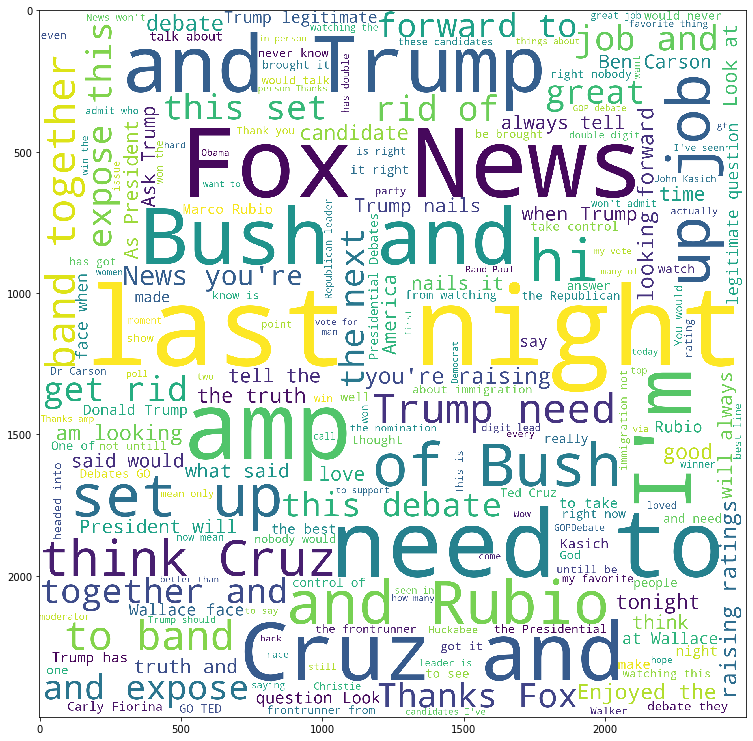

In [34]:
print("Positive Words :")
wordcloud_draw(train_pos,'white')

Negative Words :


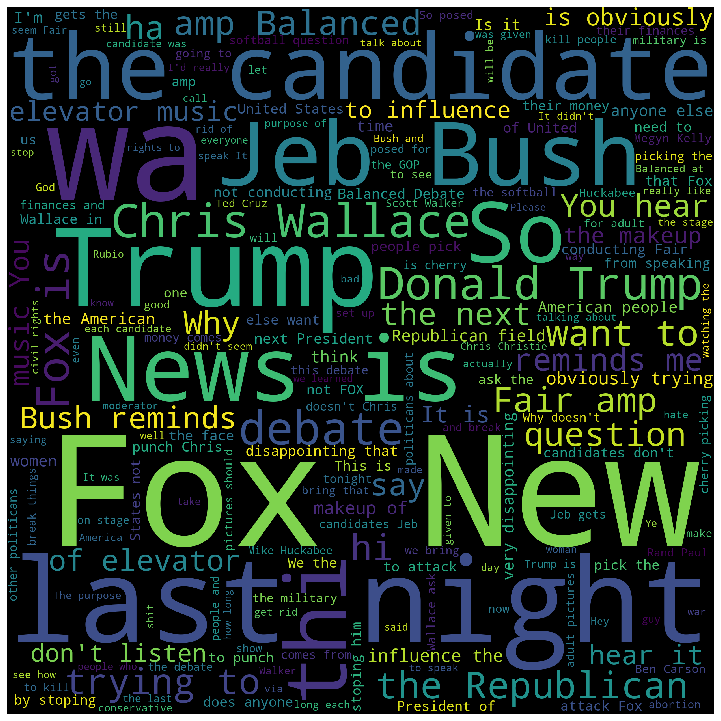

In [10]:
print('Negative Words :')
wordcloud_draw(train_neg,'black')

In [11]:
tweets =[]
stopwords_set=set(stopwords.words('english'))

In [12]:
for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.text.split() if len(e)>=3]
    words_cleaned = [word for word in words_filtered 
                    if 'http' not in word
                    and not word.startswith('@')
                    and not word.startswith('#')
                    and word != 'RT'
                    ]
    words_without_stopwords = [ word for word in words_cleaned
                              if not word in stopwords_set]
    tweets.append((words_without_stopwords,row.sentiment))

In [13]:
test_pos = test[test['sentiment'] == 'Positive']
test_pos = test_pos['text']

test_neg = test[test['sentiment']=='Negative']
test_neg=test_neg['text']

In [14]:
def get_words_in_tweets(tweets):
    all=[]
    for(words,sentiment) in tweets :
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist=nltk.FreqDist(wordlist)
    features=wordlist.keys()
    return features
w_features= get_word_features(get_words_in_tweets(tweets))

In [15]:
def extract_features(document):
    document_words =set(document)
    features={}
    
    for word in w_features:
        features['contains(%s)'%word]= (word in document_words)
    return features

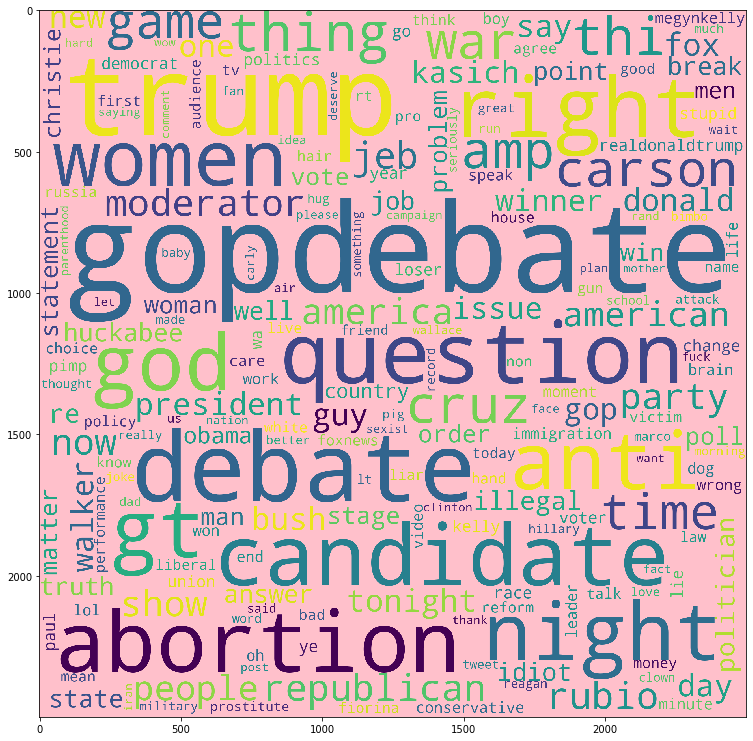

In [35]:
wordcloud_draw(w_features,'pink')

In [17]:
training_set = nltk.classify.apply_features(extract_features,tweets)
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [19]:
neg_count =0
pos_count=0

for obj in test_neg :
    res = classifier.classify(extract_features(obj.split()))
    if(res=='Negative'):
        neg_count=neg_count+1

for obj in test_pos :
    res=classifier.classify(extract_features(obj.split()))
    if(res=='Positive'):
        pos_count=pos_count+1
        


In [23]:
print('[Negative]: %s/%s '  % (neg_count,len(test_neg)))        
print('[Positive]: %s/%s '  % (pos_count,len(test_pos)))   


[Negative]: 780/821 
[Positive]: 74/222 
